# Produce the various exclusion plots

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import pickle
import gc

from exp_analysis_class import full_likelihood, compute_likelihood_from_retrieved
from dark_nus_utils import load_datasets
from const import alphaQED
from analyses_dict import analyses
from parameters_dict import *
from dark_nus_utils import retrieve_full_analysis

from likelihood_contours_plot import *

In [3]:
hierarchy = 'light'
D_or_M = 'majorana'

save_folder = f'../fig/6_limit_visualisation/{hierarchy}_{D_or_M}/'
!mkdir -p $save_folder

set_plot_style()

In [4]:
# my_exp_analyses = load_datasets(hierarchies=['heavy', 'light'],
#                                   D_or_Ms=D_or_M,
#                                   fluxes=['FHC', 'RHC'],
#                                 timeit=True, 
#                                 direct_load_objects=False,
#                                 load_grid=False,
#                                 dump=True,
#                                 nentries=1000000)

In [5]:
my_exp_analyses = load_datasets(
                                hierarchies=hierarchy, 
                                D_or_Ms=D_or_M, 
                                fluxes=['FHC', 'RHC'],
                                timeit=True, 
                                direct_load_objects=True,
                                load_grid=False,
                                dump=False,
                                nentries=1000000)

light majorana FHC
Wall time: 4.608780145645142 s, CPU time: 0.5970934790000002
light majorana RHC
Wall time: 4.604785919189453 s, CPU time: 0.5651684129999999


In [10]:
analysis_names = [
                    'tpc_light',
                    'tpc_light_projection1',
                    'tpc_light_projection2',
                    'nueccqe_fgd',
                    'single_photon_fgd',
                    'nueccqe_fgd_projection1',
                    'single_photon_fgd_projection1',
                    'nueccqe_fgd_projection2',
                    'single_photon_fgd_projection2',
                  ]

# $m_{Z^\prime} - \varepsilon$

In [11]:
case_vars = ['mz', 'epsilon']
retrieved = retrieve_full_analysis(case_vars, hierarchy)
likes, mus, sigma2s = compute_likes(retrieved, 
                                    my_exp_analyses, 
                                    hierarchy,
                                    D_or_M,
                                    analysis_names)

tpc_light FHC
tpc_light RHC
tpc_light_projection1 FHC
tpc_light_projection1 RHC
tpc_light_projection2 FHC
tpc_light_projection2 RHC
nueccqe_fgd FHC
nueccqe_fgd RHC
single_photon_fgd FHC
nueccqe_fgd_projection1 FHC
nueccqe_fgd_projection1 RHC
single_photon_fgd_projection1 FHC
nueccqe_fgd_projection2 FHC
nueccqe_fgd_projection2 RHC
single_photon_fgd_projection2 FHC


In [13]:
likes['tpc_light_projection1_2'] = combine_likes([likes['tpc_light_projection1'], likes['tpc_light_projection2']])
likes['nueccqe_fgd_projection1_2'] = combine_likes([likes['nueccqe_fgd_projection1'], likes['nueccqe_fgd_projection2']])
likes['single_photon_fgd_projection1_2'] = combine_likes([likes['single_photon_fgd_projection1'], likes['single_photon_fgd_projection2']])

likes['current_data'] = combine_likes([likes['tpc_light'], likes['single_photon_fgd']])
likes['full_projection'] = combine_likes([likes['tpc_light_projection1_2'], likes['single_photon_fgd_projection1_2']])

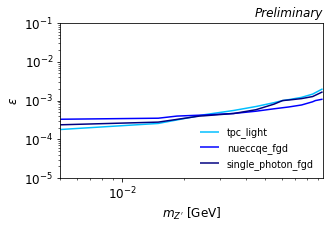

In [26]:
basic_contour_plot(case_vars,
                   retrieved,
                   likes,
                   ['tpc_light', 'nueccqe_fgd', 'single_photon_fgd'],
                   save_name='tpc_vs_fgd',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='lower right',
                   colors=['deepskyblue', 'blue', 'navy'],
                   linestyles=['-', '-', '-'])

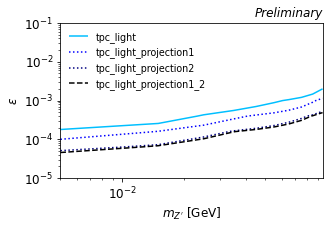

In [21]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['tpc_light', 'tpc_light_projection1', 'tpc_light_projection2', 'tpc_light_projection1_2'],
                   save_name='tpc_light_projections',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='upper left',
                   colors=['deepskyblue', 'blue', 'navy', 'black'],
                   linestyles=['-', ':', ':', '--'])

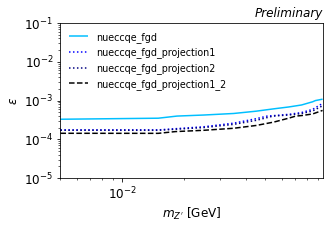

In [22]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['nueccqe_fgd', 'nueccqe_fgd_projection1', 'nueccqe_fgd_projection2', 'nueccqe_fgd_projection1_2'],
                   save_name='nueccqe_fgd_projections',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='upper left',
                   colors=['deepskyblue', 'blue', 'navy', 'black'],
                   linestyles=['-', ':', ':', '--'])

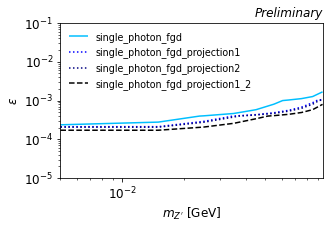

In [23]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['single_photon_fgd', 'single_photon_fgd_projection1', 'single_photon_fgd_projection2', 'single_photon_fgd_projection1_2'],
                   save_name='single_photon_fgd_projections',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='upper left',
                   colors=['deepskyblue', 'blue', 'navy', 'black'],
                   linestyles=['-', ':', ':', '--'])

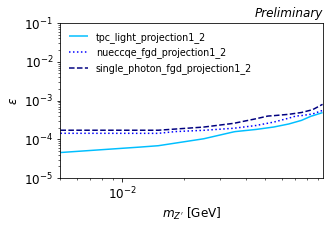

In [24]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['tpc_light_projection1_2', 'nueccqe_fgd_projection1_2', 'single_photon_fgd_projection1_2'],
                   save_name='only_projections',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='upper left',
                   colors=['deepskyblue', 'blue', 'navy', 'black'],
                   linestyles=['-', ':', '--'])

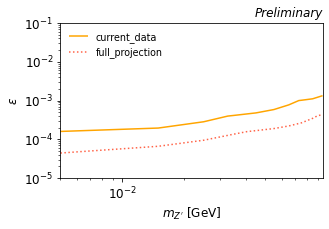

In [25]:
ax = set_canvas(f'{case_vars[0]}_{case_vars[1]}')
ax.set_ylim(1e-5, 1e-1)
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['current_data', 'full_projection'],
                   save_name='tpc_final',
                   save_folder=save_folder,
                   ax=ax,
                   legend_loc='upper left',
                   colors=['orange', 'tomato'],
                   linestyles=['-', ':'])

# Heavy $m_N - |U_{\mu N}|^2$

In [27]:
case_vars = ['m4', 'Umu4_2']
retrieved = retrieve_full_analysis(case_vars, hierarchy)
likes, mus, sigma2s = compute_likes(retrieved, 
                                    my_exp_analyses, 
                                    hierarchy,
                                    D_or_M,
                                    analysis_names)

tpc_light FHC
tpc_light RHC
tpc_light_projection1 FHC
tpc_light_projection1 RHC
tpc_light_projection2 FHC
tpc_light_projection2 RHC
nueccqe_fgd FHC
nueccqe_fgd RHC
single_photon_fgd FHC
nueccqe_fgd_projection1 FHC
nueccqe_fgd_projection1 RHC
single_photon_fgd_projection1 FHC
nueccqe_fgd_projection2 FHC
nueccqe_fgd_projection2 RHC
single_photon_fgd_projection2 FHC


In [46]:
likes['tpc_light_projection1_2'] = combine_likes([likes['tpc_light_projection1'], likes['tpc_light_projection2']])
likes['nueccqe_fgd_projection1_2'] = combine_likes([likes['nueccqe_fgd_projection1'], likes['nueccqe_fgd_projection2']])
likes['single_photon_fgd_projection1_2'] = combine_likes([likes['single_photon_fgd_projection1'], likes['single_photon_fgd_projection2']])

likes['current_data'] = combine_likes([likes['tpc_light'], likes['single_photon_fgd']])
likes['full_projection'] = combine_likes([likes['tpc_light_projection1_2'], likes['nueccqe_fgd_projection1_2']])

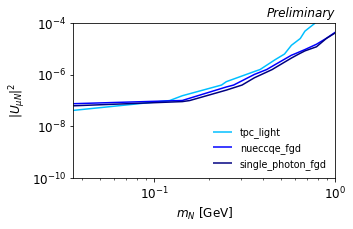

In [45]:
basic_contour_plot(case_vars,
                   retrieved,
                   likes,
                   ['tpc_light', 'nueccqe_fgd', 'single_photon_fgd'],
                   save_name='tpc_vs_fgd',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='lower right',
                   colors=['deepskyblue', 'blue', 'navy'],
                   linestyles=['-', '-', '-'])

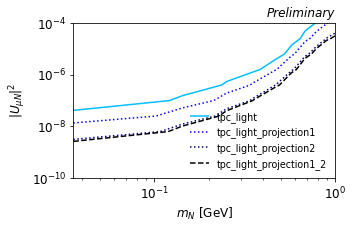

In [30]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['tpc_light', 'tpc_light_projection1', 'tpc_light_projection2', 'tpc_light_projection1_2'],
                   save_name='tpc_light_projections',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='lower right',
                   colors=['deepskyblue', 'blue', 'navy', 'black'],
                   linestyles=['-', ':', ':', '--'])

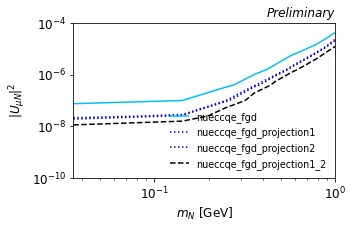

In [31]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['nueccqe_fgd', 'nueccqe_fgd_projection1', 'nueccqe_fgd_projection2', 'nueccqe_fgd_projection1_2'],
                   save_name='nueccqe_fgd_projections',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='lower right',
                   colors=['deepskyblue', 'blue', 'navy', 'black'],
                   linestyles=['-', ':', ':', '--'])

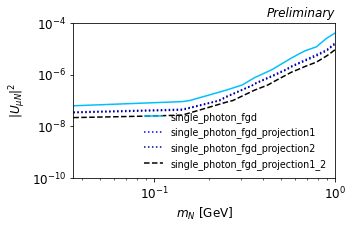

In [32]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['single_photon_fgd', 'single_photon_fgd_projection1', 'single_photon_fgd_projection2', 'single_photon_fgd_projection1_2'],
                   save_name='single_photon_fgd_projections',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='lower right',
                   colors=['deepskyblue', 'blue', 'navy', 'black'],
                   linestyles=['-', ':', ':', '--'])

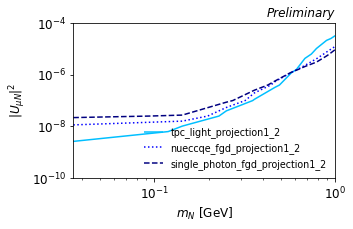

In [44]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['tpc_light_projection1_2', 'nueccqe_fgd_projection1_2', 'single_photon_fgd_projection1_2'],
                   save_name='only_projections',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='lower right',
                   colors=['deepskyblue', 'blue', 'navy', 'black'],
                   linestyles=['-', ':', '--'])

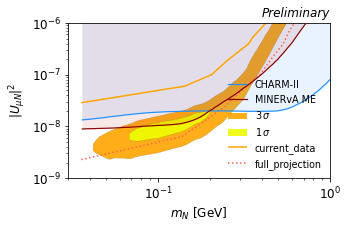

In [47]:
ax = set_canvas(f'{case_vars[0]}_{case_vars[1]}')
m4_Umu4_2_light_plot(ax)
ax.set_ylim(1e-9, 1e-6)
ax.set_xlim(0.03, 1)
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['current_data', 'full_projection'],
                   save_name='tpc_final',
                   save_folder=save_folder,
                   ax=ax,
                   legend_loc='lower right',
                   colors=['orange', 'tomato'],
                   linestyles=['-', ':'])